# The PyData Stack

In this lab, you should analyze the famous [Boston Housing Dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html).  Here's what you should do:

* Load the data into a DataFrame and determine the purpose of the dataset.
* Determine some basic statistics about the features.  Is there any missing data?  How do you know?
* Decide what all the features mean, and their type (hint: explore the stats of each, and the object returned by `load_boston` in the link above).
* Graph histograms of a few appropriate features, and describe what you see.
* Graph scatter plots of the numerical features against the median house price.  What do you take from these graphs?
* Slice the dataset _horizontally_, that is, use boolean indexing to create a sub-DataFrame from your data.  You should find a way to slice it that does something nontrivial: describe why what you've done is interesting (take a look at some of our previous notebooks for examples).
* Create another graph that justifies that the above is interesting.
* Knowing that this datset is typically used in regression to predict the value of the house, slice the data _vertically_, that is, remove some columns that you believe are not helpful for this task.  Justify your reasoning (from the steps you've taken before this).
* Throughout all of the above, discuss what you're seeing in markdown cells, and use markdown appropriately to create headers to break up the analysis.  It's okay if you're wrong or just confused/unsure about your observations--this lab is about experimentation and playfulness with data!

### Load Dataset 

In [14]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn import datasets
import seaborn
from sklearn.linear_model import LinearRegression

%matplotlib inline

plt.style.use("fivethirtyeight") 

In [2]:
import pandas as pd
import numpy as np

# Load dataset from sklearn
boston = datasets.load_boston()

print(boston.keys())
print(boston.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
for key in boston.keys():
    print(key, boston[key].shape if type(boston[key]) is np.ndarray else len(boston[key]), type(boston[key]))
    print(boston[key])
    print()

data (506, 13) <class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]

target (506,) <class 'numpy.ndarray'>
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  2

### Purpose of the dataset

According to the dataset's description and the sklearn documentation, the purpose of this dataset is to predict the median value of owner-occupied homes (in the $1000's) in a town based on 13 features. 

### Missing Data

In [4]:
df = pd.DataFrame(
    data = np.hstack((boston.data, np.reshape(boston.target, (-1, 1)))), 
    columns = np.append(boston['feature_names'], 'MEDV')
)

# print(np.isnan(np.sum(boston['data'])), np.isnan(np.sum(boston['target'])))
print(df.isnull().values.any)

<built-in method any of numpy.ndarray object at 0x00000197C5C23440>


I'm not quite sure what "missing data" means in this context. However, assumimg that it refers to NaN, which is a placeholder for any missing numerical values in a numpy array, our dataframe contains none, as revealed by the above cell, meaning that every observation contains information about its features and its response. 

### Feature Analysis

In [5]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
# print(boston.feature_names)
for i, feature_i in enumerate(boston.feature_names):
    print(feature_i, df[feature_i].dtype)

CRIM float64
ZN float64
INDUS float64
CHAS float64
NOX float64
RM float64
AGE float64
DIS float64
RAD float64
TAX float64
PTRATIO float64
B float64
LSTAT float64


#### Here is a summary of each feature in the dataset, based on on the information from the panda dataframe:
- **CRIM**     per capita crime rate by town **(numerical, float64)**
- **ZN**       proportion of residential land zoned for lots over 25,000 sq.ft.**(numerical, float64)**
- **INDUS**    proportion of non-retail business acres per town **(numerical, float64)**
- **CHAS**     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) **(categorial, float64)**
- **NOX**      nitric oxides concentration (parts per 10 million) **(numerical, float64)**
- **RM**       average number of rooms per dwelling **(ordinal, float64)**
- **AGE**      proportion of owner-occupied units built prior to 1940 **(numerical, float64)**
- **DIS**      weighted distances to five Boston employment centres **(numerical, float64)**
- **RAD**      index of accessibility to radial highways **(ordinal, float64)**
- **TAX**      full-value property-tax rate per ```$10,000``` **(numerical, float64)**
- **PTRATIO**  pupil-teacher ratio by town **(numerical, float64)**
- **B**        ```1000(Bk - 0.63)^2``` where Bk is the proportion of blacks by town **(numerical, float64)**
- **LSTAT**    % lower status of the population **(numerical, float64)**
- **MEDV**     Median value of owner-occupied homes in ```$1000's``` **(numerical, float64)**

### Histograms

(array([439.,  44.,  14.,   1.,   3.,   2.,   0.,   1.,   1.,   1.]),
 array([6.3200000e-03, 8.9033080e+00, 1.7800296e+01, 2.6697284e+01,
        3.5594272e+01, 4.4491260e+01, 5.3388248e+01, 6.2285236e+01,
        7.1182224e+01, 8.0079212e+01, 8.8976200e+01]),
 <BarContainer object of 10 artists>)

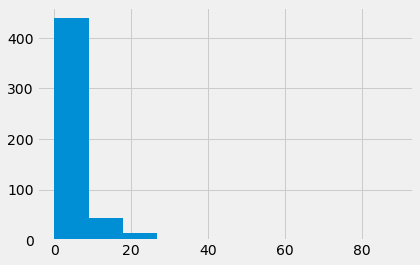

In [9]:
plt.hist(df['CRIM'])

This histogram of the 'CRIM' feature in the dataset is skewed towards the left. I see the vast majority of towns having less than 10% for their per capita crime rate, with some others having a little more, but none more than 30%. 

(array([ 14.,  31.,  29.,  42.,  32.,  38.,  39.,  42.,  71., 168.]),
 array([  2.9 ,  12.61,  22.32,  32.03,  41.74,  51.45,  61.16,  70.87,
         80.58,  90.29, 100.  ]),
 <BarContainer object of 10 artists>)

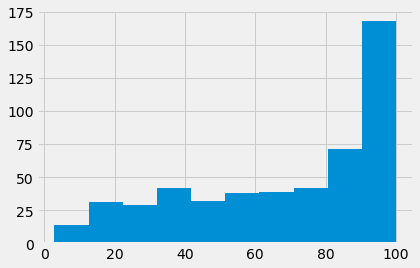

In [10]:
plt.hist(df['AGE'])

This histogram of the 'AGE' feature is left-skewed. For a plurality of the towns in the dataset, 80% and more of the owner-occupied units had been built prior to 1940. However, there are still a lot of towns with smaller proportions. There is almost a uniform distribution from 35% to 80%, signifying that a similar number of towns had about 40%-50% as 70%-80% and so forth.  The final region from 0% to 10% is the shortest, which makes sense since the data was published in 1978. 

### Scatterplots

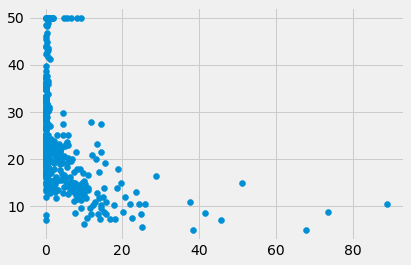

In [25]:
plt.scatter(x = df['CRIM'], y = df['MEDV'])

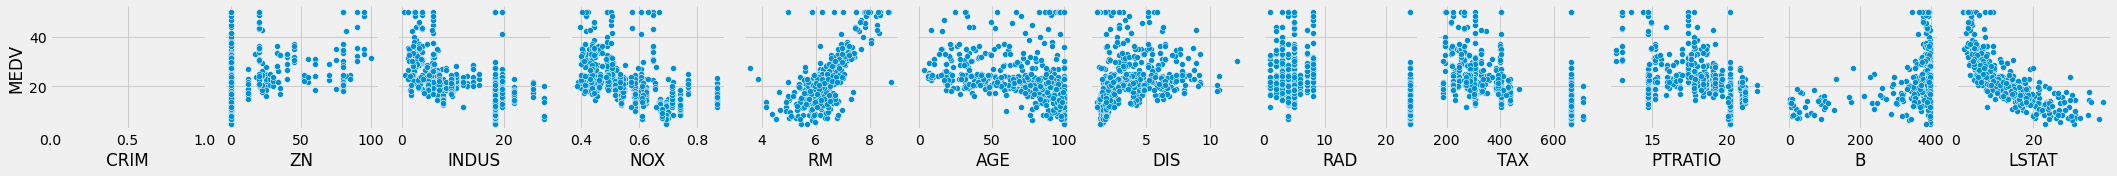

In [26]:
seaborn.pairplot(df, y_vars=['MEDV'], x_vars=[key for key in boston.feature_names if key != "CHAS"])

I've plotted each numerical feature (so exclusing CHAS) against the median house value using seaborn's pairplot. For some reason, seaborn has decided not to plot CRIM against MEDV, so I've plotted that separately with matplotlib. Here are some of my thoughts for each feature:
- CRIM: High crime rates certainly correspond to lower housing prices, but lower crime rates have an ambiguous effect. A multitude of samples of varying housing prices can be found at the lower end of the crime rate axis.
- ZN: I don't think there's a strong correlation between ZN and MEDV. I can't wrap my head around the relation based on the graph.
- INDUS: Areas with low industry have higher housing prices, and areas with high industry have lower housing prices. 
- NOX: It seems that, in general, the larger the nitric oxide concentration, the lower the housing price.
- RM: There's a strong, positive correlation between the number of rooms per home and the median housing price.
- AGE: I can't identify any strong correlations, except that older homes seem to have a larger range of possible MEDV.
- DIS: The lowest housing prices are the smallest distance from the five Boston employment centers.
- RAD: I don't think there's any obvious relationships shown by this graph.
- TAX: The highest tax rates are correlated with the lowest housing prices, but no other relationship is clearly discernable.
- PTRATIO: There's not a strong correlation between PTRATIO and MEDV.
- B: This feature has racist origins, and ought not to be applied. From this standpoint, we won't discuss this scatterplot.
- LSTAT: There is a strong negative correlation between the "% lower status of the population" and housing prices.